# setup

In [1]:
import torch
import os
import matplotlib.pyplot as plt

from utils import Imagenet_xy, train, eval, model_select, plot_log

from tqdm import tqdm

In [2]:
BATCH_SIZE = 128
EPOCHS = 1

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

# data

In [4]:
val = Imagenet_xy('val')

Resolving data files:   0%|          | 0/52 [00:00<?, ?it/s]

Resolving data files:   0%|          | 0/52 [00:00<?, ?it/s]

In [5]:
val_loader = torch.utils.data.DataLoader(val, batch_size = BATCH_SIZE, shuffle = True)

val.__len__() / BATCH_SIZE

390.625

# model

In [6]:
# model_label = 'rn18rn34_finetuned'
# model = torch.load('output/{}.pt'.format(model_label))

model_label = 'rn18'
model = model_select(model_label)

Using cache found in /home/josegfer/.cache/torch/hub/pytorch_vision_v0.10.0


In [7]:
model = model.to(device)

# train

In [8]:
criterion = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters())

In [9]:
log = []
for epoch in (range(EPOCHS)):
    loss_trn, log_trn = train(model, val_loader, optimizer, criterion, device, log = True)
    loss_val = eval(model, val_loader, criterion, device)
    
    log.append([loss_trn, loss_val])
    plot_log(log_trn, loss_val = loss_val, epoch = epoch)

  0%|          | 0/391 [00:00<?, ?it/s]

/home/josegfer/miniconda3/envs/mirror/lib/python3.8/site-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)
100%|██████████| 391/391 [02:47<00:00,  2.33it/s]


In [10]:
print(log)

[[2.9270616333807826, 2.188694787757171]]


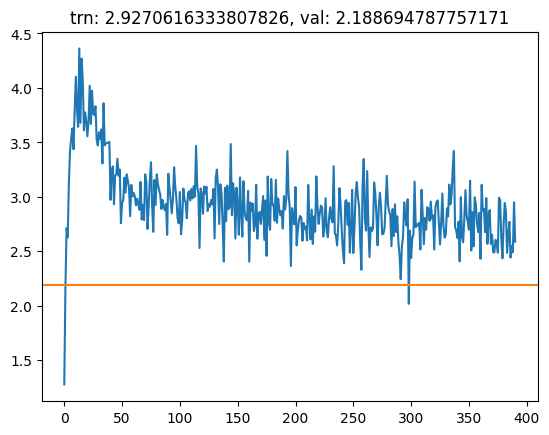

In [14]:
plt.plot(log_trn);
plt.axhline(y = loss_val, color = 'tab:orange');
plt.title('trn: {}, val: {}'.format(loss_trn, loss_val));